In [1]:
import os

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os
os.chdir('../..')
os.getcwd() 

'/home/max/mcrc-cetuximab-analysis'

In [11]:
log_tpms = pd.read_csv('data/log_tpms_from_fpkm_hgnc_filtered_by_ann.csv').set_index('sample_id')
ann = pd.read_csv('data/ann.csv').set_index('sample_id')

ann_post = ann.loc[ann['time point'] == 'post-treatment']
ann_pre = ann.loc[ann['time point'] == 'pre-treatment']

log_tpms_post = log_tpms.loc[ann_post.index]
log_tpms_pre = log_tpms.loc[ann_pre.index]
print(len(log_tpms_post), len(log_tpms_pre))

13 67
               TSPAN6      TNMD      DPM1     SCYL3     FIRRM       FGR  \
sample_id                                                                 
18R649_0010  3.480540  0.255995  5.102408  1.936358  2.787580  0.892567   
18R654_0015  4.806154  1.097403  6.701075  1.980247  4.032728  1.224764   
18R669_0001  4.572741  0.462089  6.316718  1.563327  3.303701  0.482978   
18R670_0002  4.991007  1.149359  6.265428  1.522449  2.804197  1.004059   
18R674_0006  3.417879  0.395746  5.180081  1.194022  2.385668  0.597533   
...               ...       ...       ...       ...       ...       ...   
18R454_0027  5.215787  0.449865  7.481580  1.842651  4.173487  1.025517   
18R477_0019  5.142480  0.851434  6.821403  1.300107  2.718833  0.293914   
18R507_0004  6.100763  0.892952  7.403006  1.731532  3.041447  0.831449   
18R428_0008  3.117343  0.080821  5.027521  1.632983  2.825133  1.461757   
18R705_0013  4.322289  0.583723  6.779187  1.582140  3.318828  1.062092   

                  

In [3]:
def plot_correlations(df, title, target_gene, gene_list_file, ax, xlim=(-0.5, 0.5), alpha=0.01):
    genes = open(gene_list_file, 'r').read().strip().split(', ')
    print(f'{target_gene} genes in total: ', len(genes))
    genes = list(filter(lambda gene: gene in df.columns, genes))
    print(f'{target_gene} genes in our data: ', len(genes))
    corrs = np.array([stats.pearsonr(df[target_gene], df[gene])[0] for gene in genes])
    ps = np.array([stats.pearsonr(df[target_gene], df[gene])[1] for gene in genes])
    neg_log_ps = np.array([-np.log10(p) for p in ps])
    neg_log_ps = np.nan_to_num(neg_log_ps, posinf=10)
    neg_log_ps = np.minimum(neg_log_ps, 10)
    
    neg_corrs = (corrs < 0) & (ps < alpha)
    pos_corrs = (corrs > 0) & (ps < alpha)
    neg_genes = [genes[i] for i in range(len(genes)) if neg_corrs[i]]
    pos_genes = [genes[i] for i in range(len(genes)) if pos_corrs[i]]
    print('Negative genes: ', ', '.join(neg_genes))
    print('Positive genes: ', ', '.join(pos_genes))
       
    plt.figure(figsize=(16,9))
    
    
    sns.scatterplot(x=corrs, y=neg_log_ps, ax=ax)
    for i, gene in enumerate(genes):
        ax.text(corrs[i]+0.01, neg_log_ps[i]+0.01, gene, fontsize=12)
    
    ax.plot([xlim[0], xlim[1]], [-np.log10(alpha), -np.log10(alpha)], label='p=0.01')
    ax.legend()
    
    ax.set_xticks(np.linspace(xlim[0], xlim[1], 21))
    
    ax.set_title(title)
    ax.set_xlabel('Pearson correlation')
    ax.set_ylabel('-log10 P-value')


MET genes in total:  48
MET genes in our data:  45
Negative genes:  
Positive genes:  MAPK1, MAPK8, MAPK9, MAPK14, MAPK13, MAP2K1, MAP2K2, MAP2K7, MAP2K5, ARAF, MAP3K1, MAP3K2, MAP3K4, MAP3K5, KRAS, NRAS, RAC1, ELK1, MYC, RPS6KA3, RPS6KA5
MET genes in total:  48
MET genes in our data:  45
Negative genes:  
Positive genes:  MAPK9, MAPK14, MAPK13, HRAS, KRAS, NRAS, RAC1, RPS6KA3


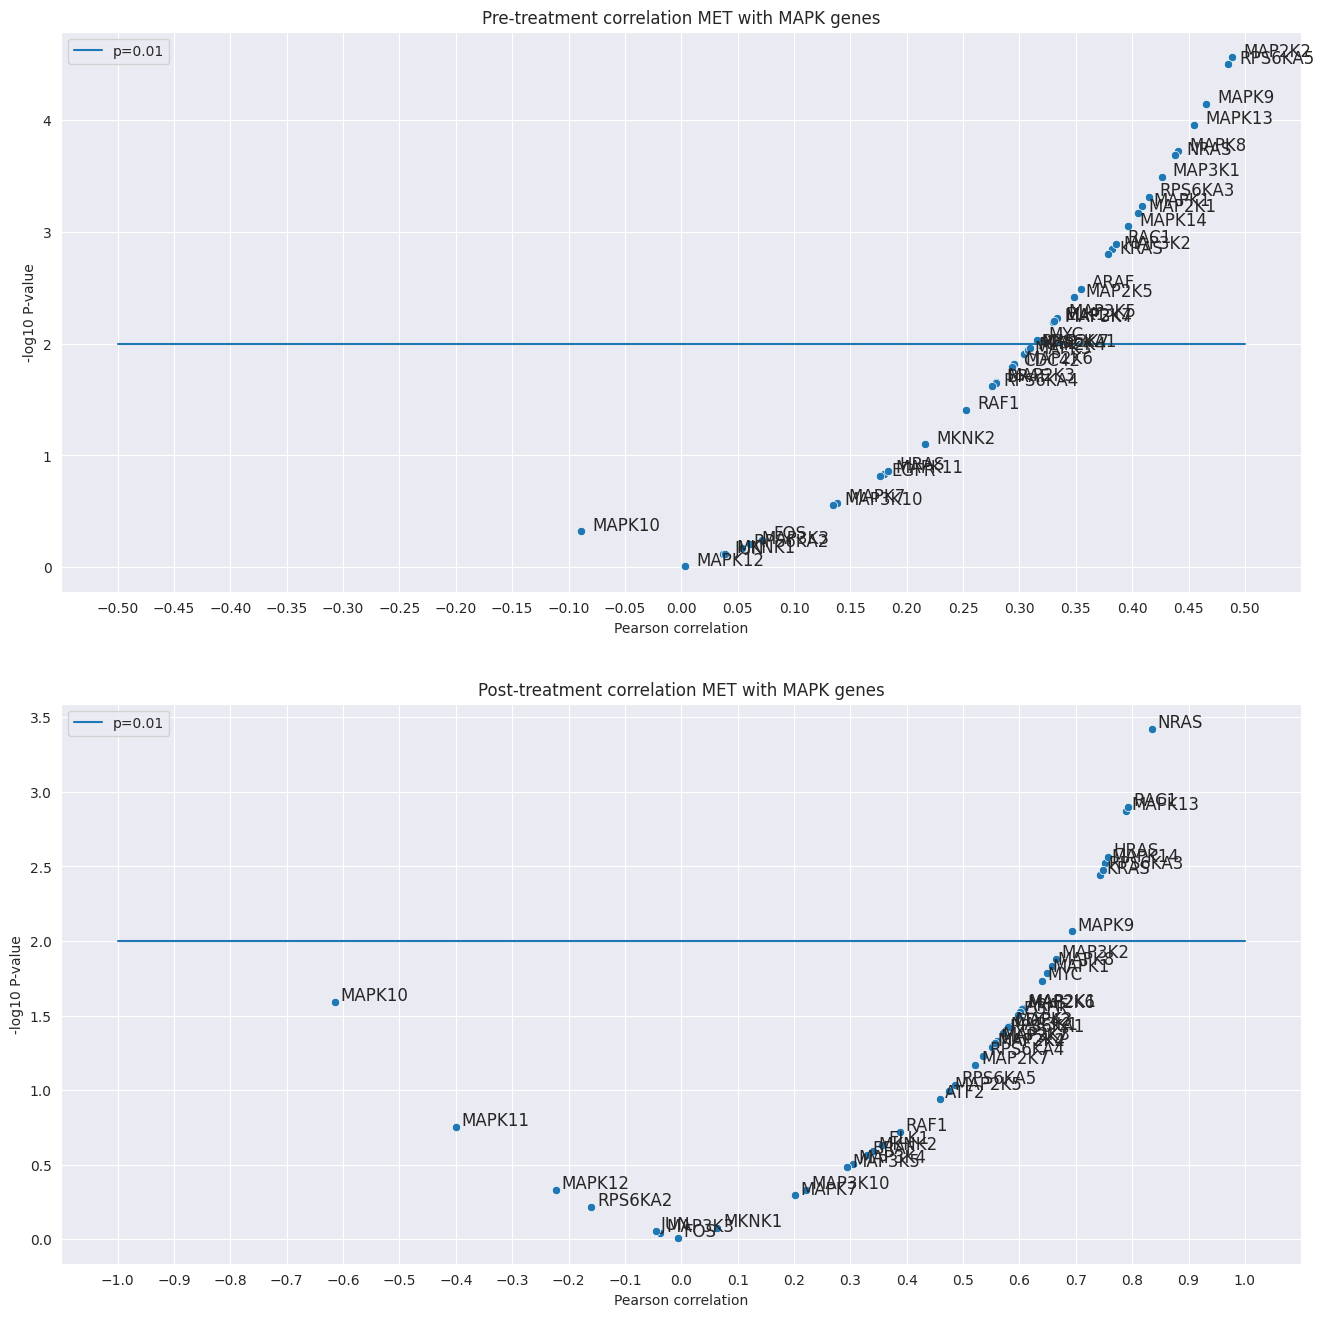

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(16, 16))

plot_correlations(log_tpms_pre, 'Pre-treatment correlation MET with MAPK genes', 'MET', 'data/gene_lists/mapk_genes.txt',
                  xlim=(-0.5, 0.5), ax=axs[0])
plot_correlations(log_tpms_post, 'Post-treatment correlation MET with MAPK genes', 'MET', 'data/gene_lists/mapk_genes.txt',
                  xlim=(-1, 1), ax=axs[1])

MET genes in total:  86
MET genes in our data:  81
Negative genes:  
Positive genes:  PIK3CB, AKT2, RHEB, PDPK1, GSK3B, GRB2, KRAS, NRAS, MAPK1, CHUK, BCL2L1, BAX, CCND1, CCNE1, CDK2, CDK4, RB1, E2F1, E2F3, EIF4EBP1, EIF4E, TGFA, MET


/tmp/ipykernel_13075/313237086.py:8: RuntimeWarning: divide by zero encountered in log10
  neg_log_ps = np.array([-np.log10(p) for p in ps])
/tmp/ipykernel_13075/313237086.py:8: RuntimeWarning: divide by zero encountered in log10
  neg_log_ps = np.array([-np.log10(p) for p in ps])


MET genes in total:  86
MET genes in our data:  81
Negative genes:  
Positive genes:  RHEB, GSK3B, HRAS, KRAS, NRAS, BAX, CDK2, CDK4, E2F3, EIF4E, VEGFA, TGFA, MET


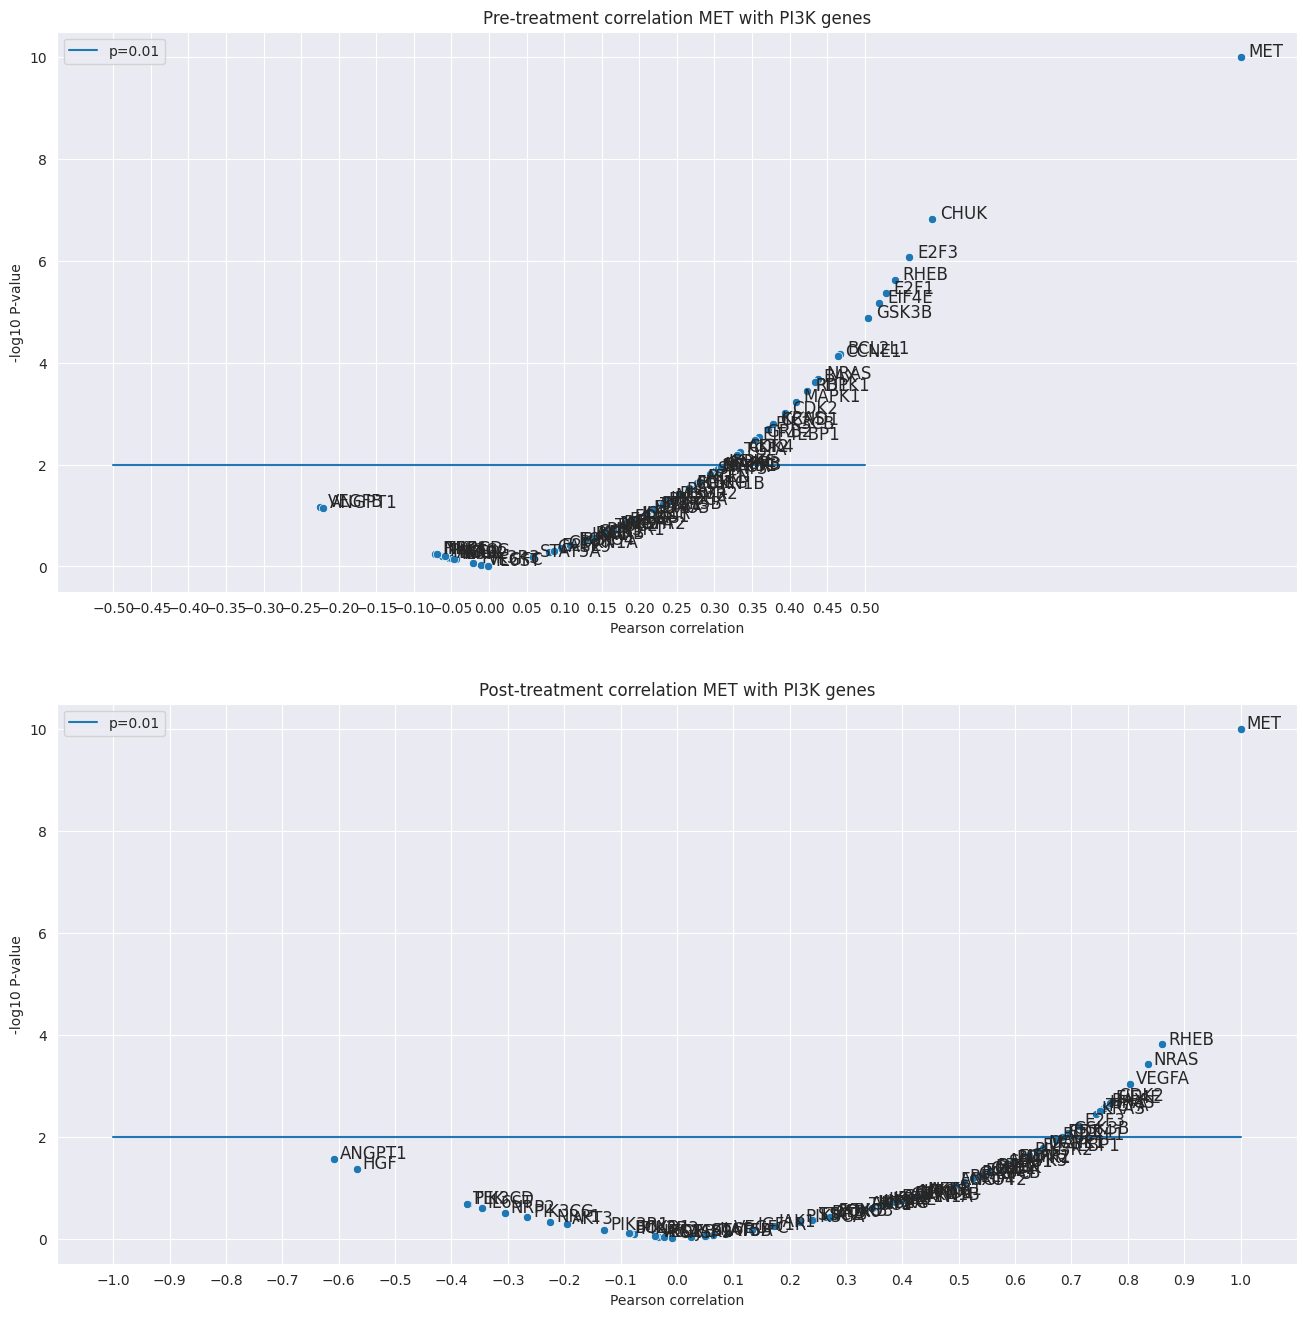

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(16, 16))

plot_correlations(log_tpms_pre, 'Pre-treatment correlation MET with PI3K genes', 'MET', 'data/gene_lists/pi3k_genes.txt',
                  xlim=(-0.5, 0.5), ax=axs[0])
plot_correlations(log_tpms_post, 'Post-treatment correlation MET with PI3K genes', 'MET', 'data/gene_lists/pi3k_genes.txt',
                  xlim=(-1, 1), ax=axs[1])

In [6]:
our_genes = log_tpms.columns 

def parse_emt(file):
    res = []
    full_res = []
    for line in open(file, 'r').readlines():
        if not line.startswith('(') and not line.startswith('GO') and not line.startswith('Gene'):
            full_res.append(line.split()[0])
        if not line.startswith('(') and not line.startswith('GO') and not line.startswith('Gene') and line.split()[0] in our_genes:
            res.append(line.split()[0])
    return full_res, res

emt_files = ['raw/' + file for file in os.listdir('raw') if file.startswith('emt')]
emt_gene_lists = {file[file.find('/') + 1:file.find('.')]: parse_emt(file)[1] for file in emt_files}
emt_full_gene_lists = {file[file.find('/') + 1:file.find('.')]: parse_emt(file)[0] for file in emt_files}

for filename, lst in emt_gene_lists.items():
    open(f'data/gene_lists/{filename}.txt', 'w').write(', '.join(lst))
    print('Full emt signatures / filtered to our genes', len(emt_full_gene_lists[filename]), len(emt_gene_lists[filename]))

Full emt signatures / filtered to our genes 9 9
Full emt signatures / filtered to our genes 33 33
Full emt signatures / filtered to our genes 82 81
Full emt signatures / filtered to our genes 5 5
Full emt signatures / filtered to our genes 20 18


MET genes in total:  9
MET genes in our data:  9
Negative genes:  
Positive genes:  CDH1, CDH17, CLDN2, CLDN3, RAB25
MET genes in total:  9
MET genes in our data:  9
Negative genes:  
Positive genes:  CDH1, CDH17, CLDN3, RAB25
MET genes in total:  33
MET genes in our data:  33
Negative genes:  IGF1, SFRP2, SFRP4
Positive genes:  
MET genes in total:  33
MET genes in our data:  33
Negative genes:  
Positive genes:  
MET genes in total:  81
MET genes in our data:  81
Negative genes:  
Positive genes:  ANXA2, BMP7, CCND1, CDH1, CEBPA, CLDN3, CLDN7, CRB3, CTNND1, ERBB3, HMGA2, ID1, ITGB4, OCLN, PXN, RHOBTB3, SPRY1, TCF12, TMSB4X, VIL1
MET genes in total:  81
MET genes in our data:  81
Negative genes:  PTN
Positive genes:  CDH1, CDH3, CLDN3, CLDN7, CTNND1, ERBB3, ITGB4, OCLN, VIL1
MET genes in total:  5
MET genes in our data:  5
Negative genes:  
Positive genes:  HMGA2
MET genes in total:  5
MET genes in our data:  5
Negative genes:  
Positive genes:  
MET genes in total:  18
MET genes in o

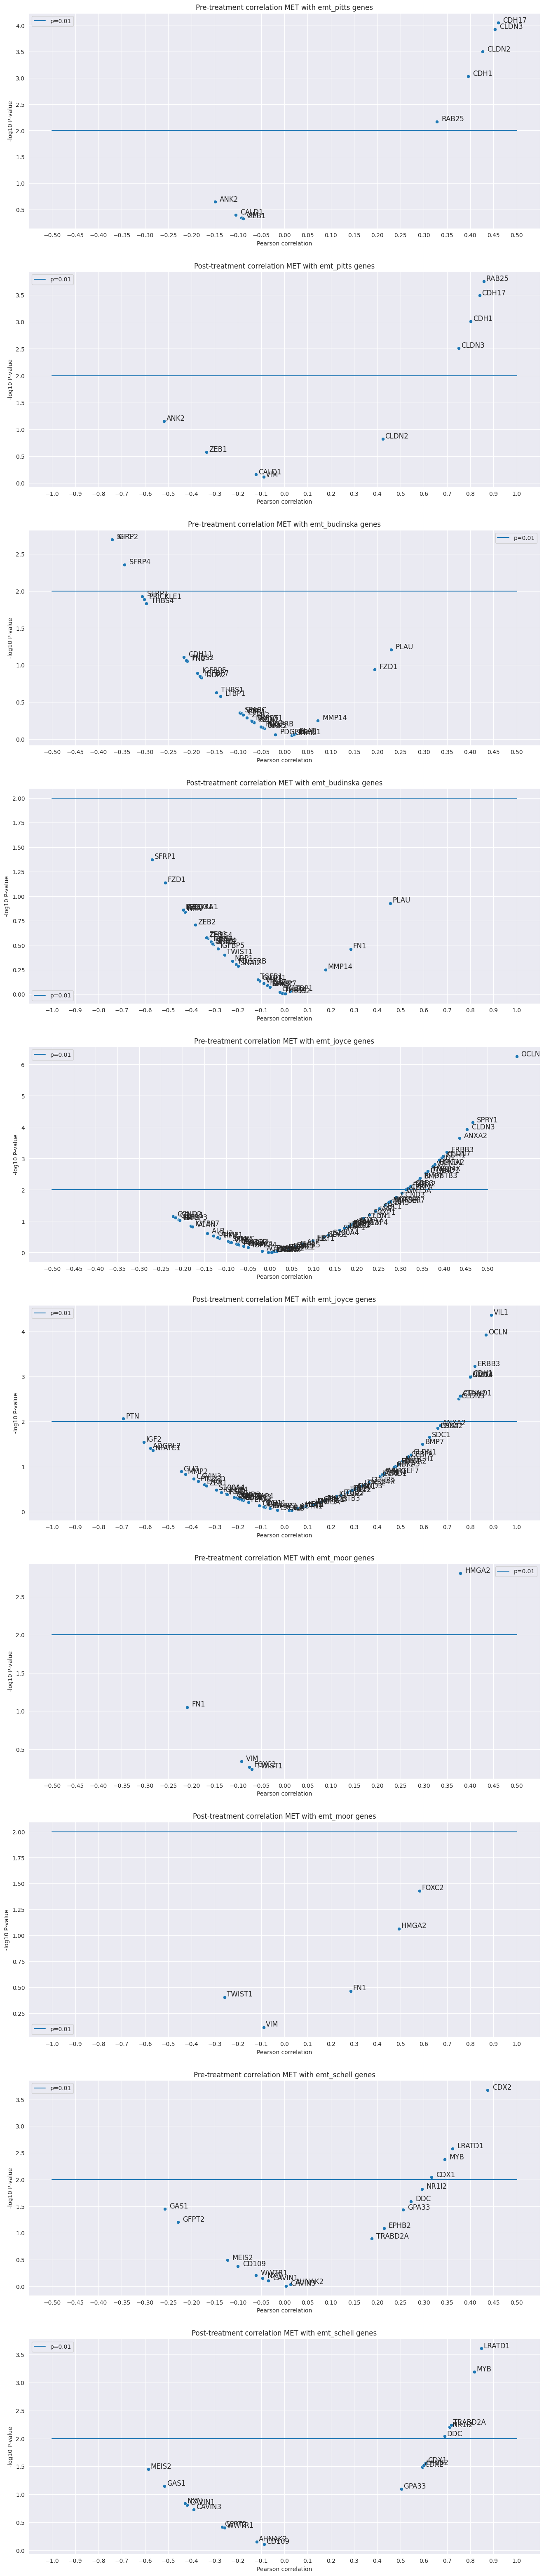

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

In [7]:
fig, axs = plt.subplots(2 * len(emt_gene_lists), 1, figsize=(16, 16 * len(emt_gene_lists)))


for i, filename in enumerate(emt_gene_lists):
    plot_correlations(log_tpms_pre, f'Pre-treatment correlation MET with {filename} genes',
                      'MET', f'data/gene_lists/{filename}.txt',
                      xlim=(-0.5, 0.5), ax=axs[i * 2])
    plot_correlations(log_tpms_post, f'Post-treatment correlation MET with {filename} genes', 
                      'MET', f'data/gene_lists/{filename}.txt',
                      xlim=(-1, 1), ax=axs[i * 2 + 1])

In [8]:
import gseapy as gp

print({key: len(emt_gene_lists[key]) for key in emt_gene_lists})

ssgsea_results = gp.ssgsea(data=log_tpms.T,
                           gene_sets=emt_gene_lists,
                           outdir=None,
                           sample_norm_method='rank',
                           permutation_num=0,
                           no_plot=True,
                           min_size=0)

ssgsea_df = ssgsea_results.res2d.rename(columns={'Name': 'sample_id'})
print(ssgsea_df)

{'emt_pitts': 9, 'emt_budinska': 33, 'emt_joyce': 81, 'emt_moor': 5, 'emt_schell': 18}
       sample_id          Term           ES       NES
0    18R695_0003  emt_budinska  7685.590367  1.144804
1    18R678_0010     emt_pitts  7394.928118  1.101509
2    18R648_0009     emt_pitts  7303.422808  1.087879
3    18R470_0011     emt_pitts  7292.651754  1.086274
4    18R435_0015     emt_pitts  7210.182966   1.07399
..           ...           ...          ...       ...
395  18R437_0018  emt_budinska  1657.941999  0.246958
396  18R508_0011    emt_schell  1540.260766  0.229429
397  18R461_0002    emt_schell  1382.399376  0.205915
398  18R465_0006    emt_schell  1008.256055  0.150184
399  18R437_0018    emt_schell      972.136  0.144804

[400 rows x 4 columns]


In [14]:
log_tpms_with_emt_signatures = log_tpms.copy()
for signature in emt_gene_lists:
    add = ssgsea_df.loc[ssgsea_df['Term'] == signature, ['sample_id', 'ES']]
    log_tpms_with_emt_signatures = log_tpms_with_emt_signatures.merge(add, left_index=True, right_on='sample_id').rename(columns={'ES': signature}).set_index('sample_id')

print(log_tpms_with_emt_signatures.isna().sum().max())
print(log_tpms_with_emt_signatures)

0
               TSPAN6      TNMD      DPM1     SCYL3     FIRRM       FGR  \
sample_id                                                                 
18R649_0010  3.480540  0.255995  5.102408  1.936358  2.787580  0.892567   
18R654_0015  4.806154  1.097403  6.701075  1.980247  4.032728  1.224764   
18R669_0001  4.572741  0.462089  6.316718  1.563327  3.303701  0.482978   
18R670_0002  4.991007  1.149359  6.265428  1.522449  2.804197  1.004059   
18R674_0006  3.417879  0.395746  5.180081  1.194022  2.385668  0.597533   
...               ...       ...       ...       ...       ...       ...   
18R454_0027  5.215787  0.449865  7.481580  1.842651  4.173487  1.025517   
18R477_0019  5.142480  0.851434  6.821403  1.300107  2.718833  0.293914   
18R507_0004  6.100763  0.892952  7.403006  1.731532  3.041447  0.831449   
18R428_0008  3.117343  0.080821  5.027521  1.632983  2.825133  1.461757   
18R705_0013  4.322289  0.583723  6.779187  1.582140  3.318828  1.062092   

                  CFH 

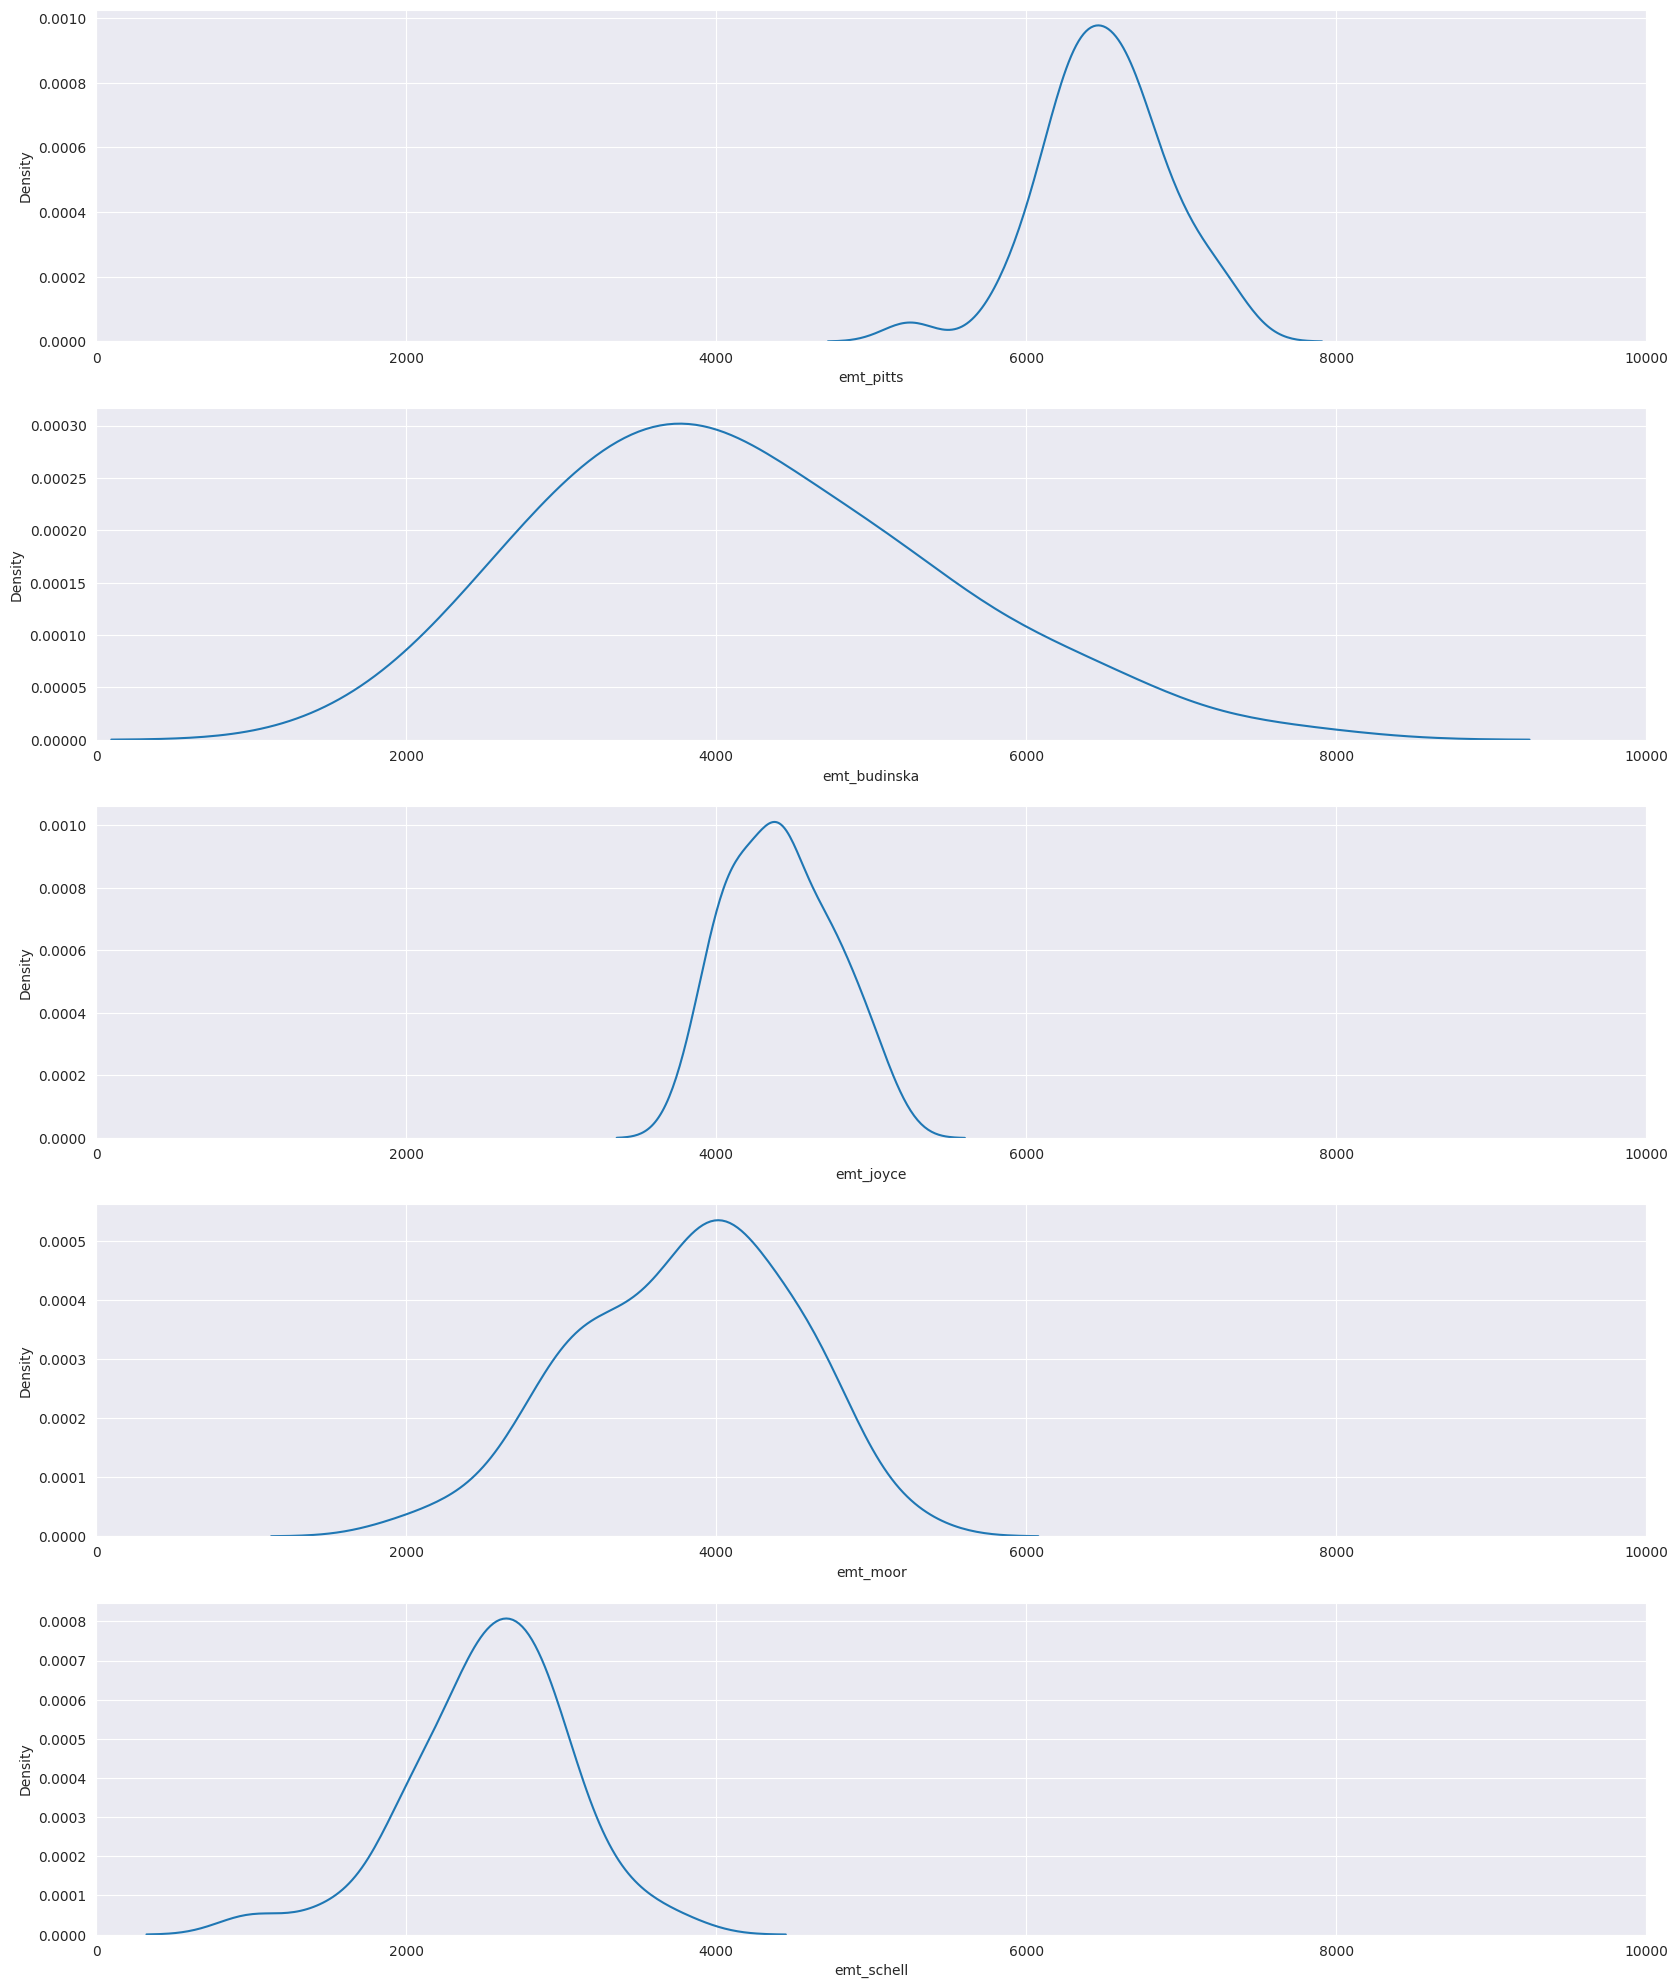

In [16]:
fig, axs = plt.subplots(5, 1, figsize=(20, 25))
for i, signature in enumerate(emt_gene_lists):
    # sns.histplot(log_tpms_with_emt_signatures[signature], bins=30, ax=axs[i])
    axs[i].set_xlim(0, 10_000)
    sns.kdeplot(log_tpms_with_emt_signatures[signature], ax=axs[i])

In [17]:
from statsmodels.robust.scale import mad

def median_scaling(df, clip=None):
    '''
    :param df : pandas.DataFrame, where rows are samples and columns are genes
    :param clip: float, default 'None', symmetrically clips the scaled data to the value
    =======================================================================================
    mad function from statsmodels.robust.scale - The Median Absolute Deviation along given axis of an array
    '''
    median = 1.0 * df.median()
    madv = 1.0 * mad(df)
    df_out = df.sub(median).div(madv)
    if clip is not None:
        return df_out.clip(-clip, clip)
    return df_out

for i, signature in enumerate(emt_gene_lists):
    log_tpms_with_emt_signatures[signature + '_rank'] = log_tpms_with_emt_signatures[signature].rank(ascending=False)
    log_tpms_with_emt_signatures[signature + '_med'] = median_scaling(log_tpms_with_emt_signatures[signature])

log_tpms_with_emt_signatures = log_tpms_with_emt_signatures
print(log_tpms_with_emt_signatures)

               TSPAN6      TNMD      DPM1     SCYL3     FIRRM       FGR  \
sample_id                                                                 
18R649_0010  3.480540  0.255995  5.102408  1.936358  2.787580  0.892567   
18R654_0015  4.806154  1.097403  6.701075  1.980247  4.032728  1.224764   
18R669_0001  4.572741  0.462089  6.316718  1.563327  3.303701  0.482978   
18R670_0002  4.991007  1.149359  6.265428  1.522449  2.804197  1.004059   
18R674_0006  3.417879  0.395746  5.180081  1.194022  2.385668  0.597533   
...               ...       ...       ...       ...       ...       ...   
18R454_0027  5.215787  0.449865  7.481580  1.842651  4.173487  1.025517   
18R477_0019  5.142480  0.851434  6.821403  1.300107  2.718833  0.293914   
18R507_0004  6.100763  0.892952  7.403006  1.731532  3.041447  0.831449   
18R428_0008  3.117343  0.080821  5.027521  1.632983  2.825133  1.461757   
18R705_0013  4.322289  0.583723  6.779187  1.582140  3.318828  1.062092   

                  CFH   

In [12]:
def is_pd(s):
    return not 'non-PD' in s

def is_nonpd(s):
    return 'non-PD' in s

# ann_post_pd = ann_post.loc[ann_post['treatment response'].apply(is_pd)]
# ann_post_nonpd = ann_post.loc[ann_post['treatment response'].apply(is_nonpd)]
# 
# log_tpms_with_emt_signatures_post_pd = log_tpms_with_emt_signatures.loc[ann_post_pd['sample_id']]
# log_tpms_with_emt_signatures_post_nonpd = log_tpms_with_emt_signatures.loc[ann_post_nonpd['sample_id']]

log_tpms_with_emt_signatures_with_ann = log_tpms_with_emt_signatures.merge(ann, on='sample_id')
df_post = log_tpms_with_emt_signatures_with_ann[log_tpms_with_emt_signatures_with_ann['time point'] == 'post-treatment']
df_post

,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,emt_budinska_rank,emt_joyce_rank,emt_moor_rank,emt_schell_rank,tissue,time point,treatment response,patient_id,sample_title,gsm_id
sample_id,,,,,,,,,,,,,,,,,,,,,
18R649_0010,3.480540,0.255995,5.102408,1.936358,2.787580,0.892567,5.863333,3.234162,5.261235,2.549503,...,12.0,28.0,67.0,7.0,primary tumor (colorectum),post-treatment,non-PD,1,POST-R-001,GSM5575333
18R669_0001,4.572741,0.462089,6.316718,1.563327,3.303701,0.482978,4.232112,3.654372,5.274364,2.265719,...,44.0,61.0,18.0,18.0,primary tumor (colorectum),post-treatment,non-PD,2,POST-R-002,GSM5575336
18R694_0002,2.433952,0.363088,5.065921,1.128134,2.367694,1.664205,7.215970,2.544471,4.637331,1.829125,...,2.0,15.0,47.0,56.0,primary tumor (colorectum),post-treatment,non-PD,4,POST-R-004,GSM5575347
18R700_0008,4.049349,0.334444,5.543058,1.213749,2.780934,1.348195,6.480602,3.312382,4.477401,2.234133,...,6.0,14.0,4.0,15.0,primary tumor (colorectum),post-treatment,PD,6,PAIR-R-006,GSM5575350
18R648_0009,4.659080,0.000000,6.268257,1.695427,3.338624,3.393130,5.676424,2.934137,5.671273,1.893872,...,28.0,50.0,58.0,31.0,primary tumor (colorectum),post-treatment,non-PD,8,PAIR-R-008,GSM5575360
18R659_0020,3.155701,0.148928,5.591686,1.498619,2.857339,1.525887,5.965106,2.643839,5.271907,2.375740,...,17.0,39.0,75.0,57.0,primary tumor (colorectum),post-treatment,non-PD,10,POST-R-010,GSM5575375
18R661_0021,5.280370,0.128963,7.134041,2.039825,3.789969,0.542092,3.921698,3.339226,6.078536,3.283622,...,72.0,68.0,59.0,75.0,primary tumor (colorectum),post-treatment,non-PD,11,POST-R-011,GSM5575376
18R663_0027,4.084198,0.021589,6.007341,1.613541,3.244679,0.575637,3.989493,2.989608,5.425749,2.121164,...,55.0,57.0,40.0,72.0,primary tumor (colorectum),post-treatment,non-PD,12,POST-R-012,GSM5575380
18R653_0014,3.227064,0.263563,5.714019,1.305220,2.768053,0.826830,5.972543,2.593434,5.236848,1.802676,...,7.0,44.0,74.0,20.0,primary tumor (colorectum),post-treatment,PD,13,POST-R-013,GSM5575390


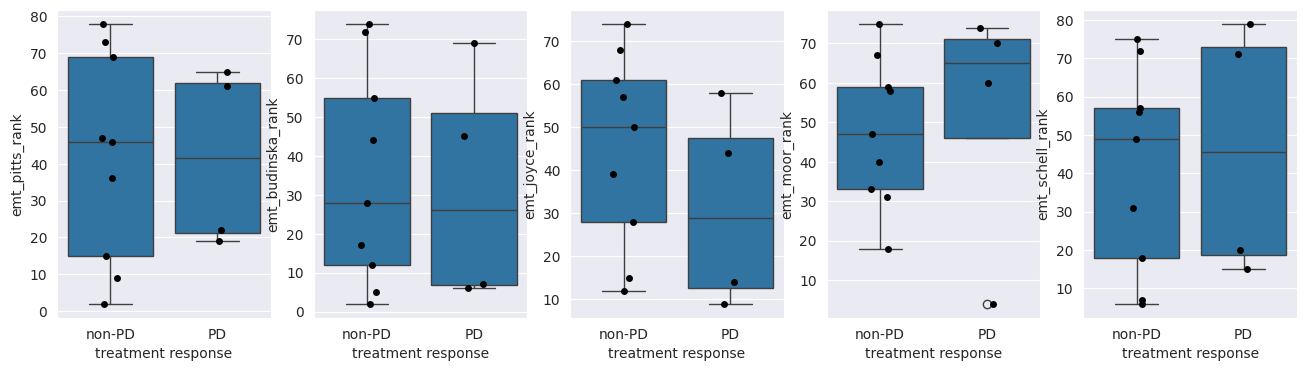

In [13]:
fig, axs = plt.subplots(1, len(emt_gene_lists), figsize=(16, 4))

for signature, ax in zip(emt_gene_lists, axs):
    sns.boxplot(df_post, x='treatment response', y=f'{signature}_rank', ax=ax)
    sns.stripplot(x='treatment response', y=f'{signature}_rank', data=df_post, color='black', jitter=True, dodge=True, ax=ax)

In [ ]:
df_pre = log_tpms_with_emt_signatures_with_ann[log_tpms_with_emt_signatures_with_ann['time point'] == 'pre-treatment']
joined = df_pre.merge(df_post, on='patient_id', how='inner')[['sample_id_x', 'treatment response_y']]
joined = joined.rename(columns={'sample_id_x': 'sample_id', 'treatment response_y': 'treatment response'})
df_pre_with_response = df_pre.merge(joined, on='sample_id', how='inner')
df_pre_with_response.head()

KeyError: "['sample_id_x'] not in index"

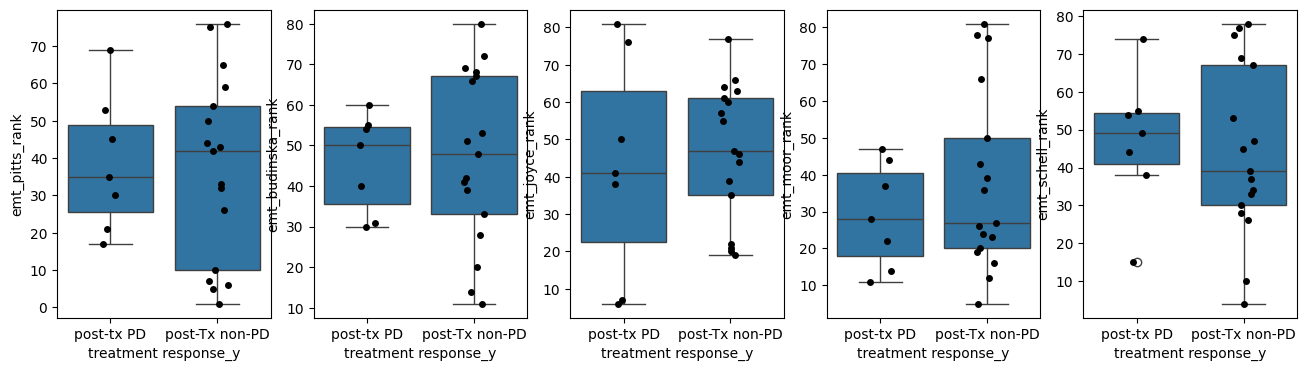

In [15]:
fig, axs = plt.subplots(1, len(emt_gene_lists), figsize=(16, 4))

for signature, ax in zip(emt_gene_lists, axs):
    sns.boxplot(df_pre_with_response, x='treatment response_y', y=f'{signature}_rank', ax=ax)
    sns.stripplot(x='treatment response_y', y=f'{signature}_rank', data=df_pre_with_response, color='black', jitter=True, dodge=True, ax=ax)

MET genes in total:  5
MET genes in our data:  5
Negative genes:  
Positive genes:  emt_budinska_rank
MET genes in total:  5
MET genes in our data:  5
Negative genes:  
Positive genes:  


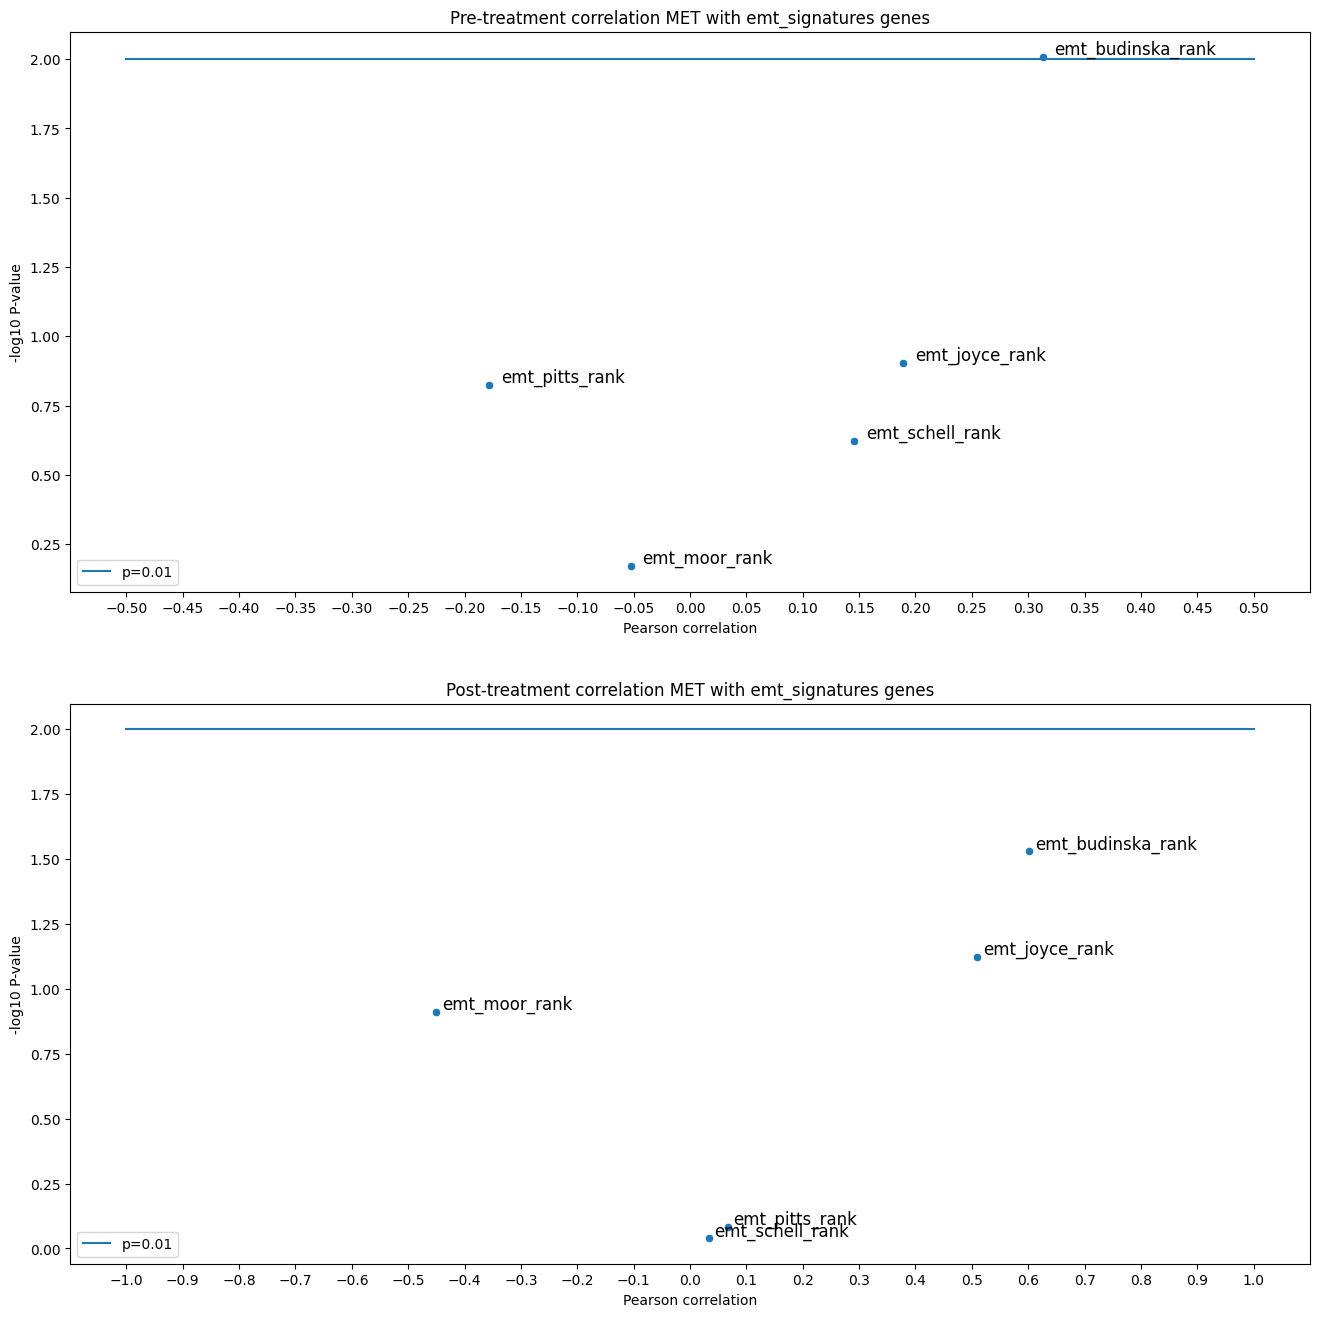

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(16, 16))

signatures_file = open('data/gene_lists/emt_signatures.txt', 'w').write('emt_pitts_rank, emt_budinska_rank, emt_joyce_rank, emt_moor_rank, emt_schell_rank')

for i, filename in enumerate(['emt_signatures']):
    plot_correlations(df_pre, f'Pre-treatment correlation MET with {filename} genes',
                      'MET', f'data/gene_lists/{filename}.txt',
                      xlim=(-0.5, 0.5), ax=axs[i * 2])
    plot_correlations(df_post, f'Post-treatment correlation MET with {filename} genes', 
                      'MET', f'data/gene_lists/{filename}.txt',
                      xlim=(-1, 1), ax=axs[i * 2 + 1])